In [1]:
import susie
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris


In [4]:
url = 'TrES-3 bsu examples.csv'

# Read the CSV file directly from the URL
data = pd.read_csv(url)
tra_or_occs = np.array(data["tra_or_occ"])#change names to columns needed
epochs = np.array(data["Epoch"].astype('int'))
mid_times = np.array(data["Mid times"])
mid_time_errs = np.array(data["Mid time error"])

In [ ]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=tra_or_occs, time_scale='tdb')

In [ ]:
ephemeris_obj1 = Ephemeris(timing_obj1)

In [ ]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')
for key, value in linear_model_data.items():
    print(f"{key}: {value}\n")

period: 1.3055538347232958

period_err: 0.0002442969919262245

conjunction_time: 2460447.7734325896

conjunction_time_err: 0.00545481930156573

model_type: linear

model_data: [2460447.77343259 2460460.82897094 2460473.88450928 2460477.80117079]



In [ ]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')
for key, value in quadratic_model_data.items():
    print(f"{key}: {value}\n")

period: 1.3066468868720476

period_err: 0.001434882299551676

conjunction_time: 2460447.7691011517

conjunction_time_err: 0.008272615634690327

period_change_by_epoch: -7.901065440823836e-05

period_change_by_epoch_err: 0.00010175578415367402

model_type: quadratic

model_data: [2460447.76910115 2460460.83161949 2460473.88623676 2460477.80108123]



In [ ]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}")

Linear Model BIC: 206.42135567519747
Quadratic Model BIC: 131.58600337158992


In [ ]:
delta_bic_value = ephemeris_obj1.calc_delta_bic()

print(f"\u0394 BIC: {delta_bic_value}")

Δ BIC: 74.83535230360755


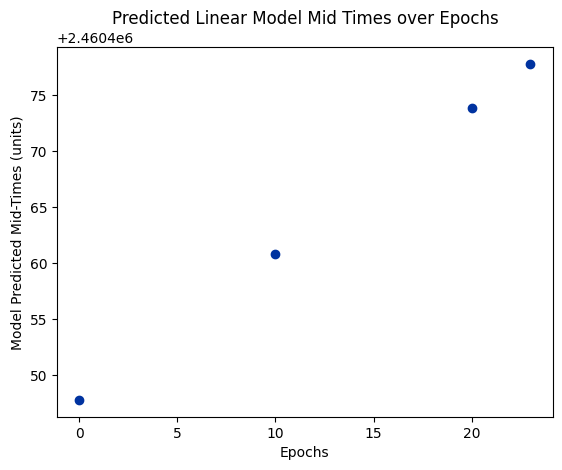

In [ ]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(linear_model_data, save_plot=False)

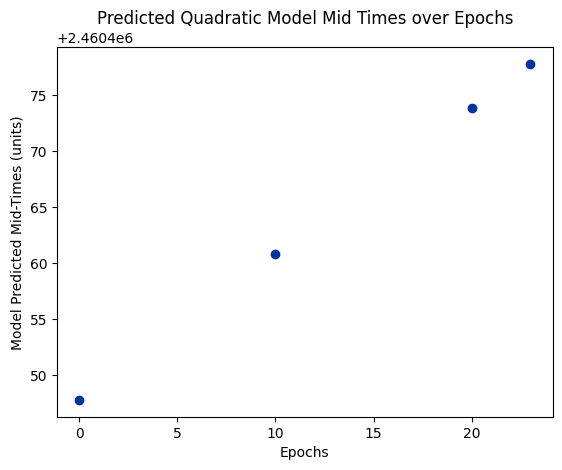

In [ ]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(quadratic_model_data, save_plot=False)

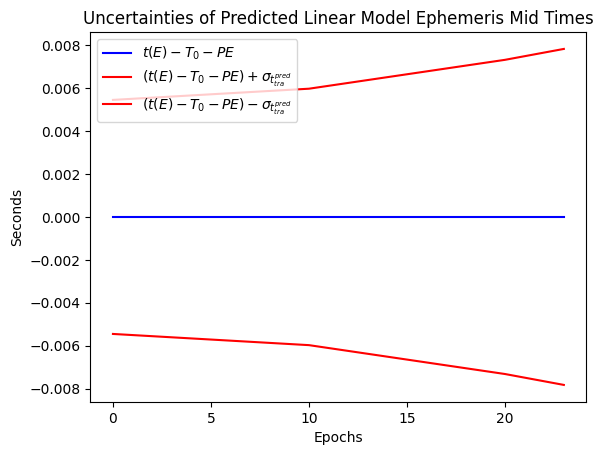

In [ ]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)

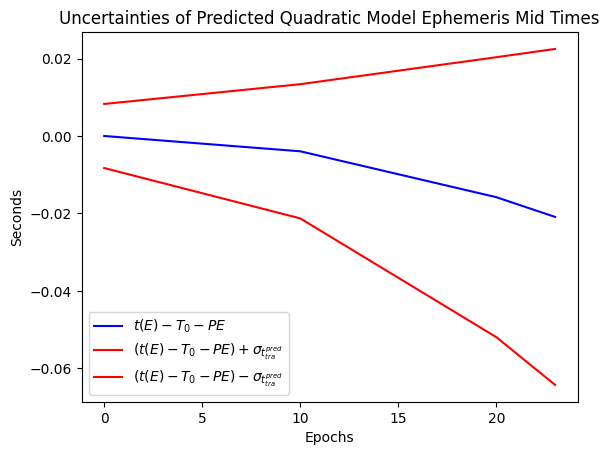

In [ ]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)

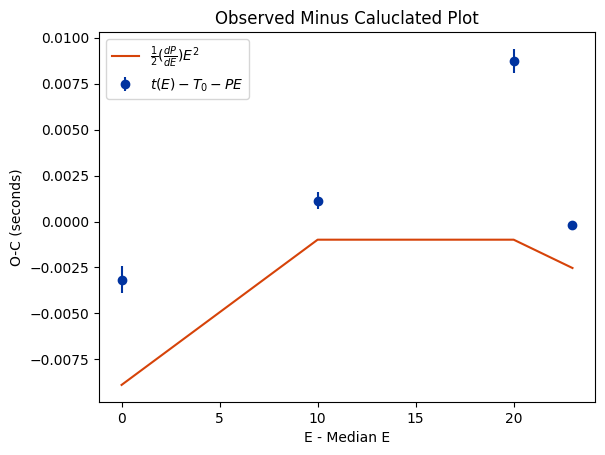

In [ ]:
ephemeris_obj1.plot_oc_plot()

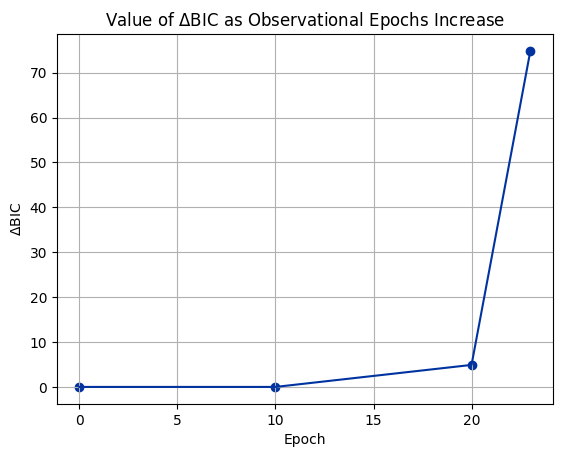

In [ ]:
ephemeris_obj1.plot_running_delta_bic()